In [2]:
# Importing all the important libraries which will ease our task later
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using the data of GlobalandTempertureByCity for this purpose first we will have to locate the path of the file stored in system.

In [3]:
#Reading the csv file of the GlobalandTemperatureByCity
cities = pd.read_csv("F:\Assignemnt 5\GlobalLandTemperaturesByCity.csv")

Locating city has Ahmadnagar and making coloumns of it using Date and Temperature

In [4]:
Ahm= cities.loc[cities['City'] == 'Ahmadnagar', ['dt','AverageTemperature']] 
Ahm.columns = ['Date','Temperature']

It is necessary that we convert date into the format which pandas can understand and use it later.

In [5]:
Ahm['Date'] = pd.to_datetime(Ahm['Date'])

Now we have to set dataframe along with index. For this operation we use reset_index which would add index from 0 to lenght of dataframe.

In [6]:
Ahm.reset_index(drop=True, inplace=True)
Ahm.set_index('Date', inplace=True)
# Since drop=True it will not add any replaced index column
# inplace=True makes chnages in original data if it is true.

In [7]:
#Considering the temperature data from 1912 to 2012-01-01
Ahm = Ahm.loc['1912':'2012-01-01']
Ahm = Ahm.asfreq('M', method='bfill')

Important point to note: While filling the missing values it is inappropiate to use methods of jumbling; because the sense
time series would be lost, so we can use methods such as backfill/padfill or fill out the average values at blank spaces.
"asfreq" is the function which provides a method to fill the missing values 

In [8]:
Ahm.head()

,Temperature
Date,
1912-01-31,23.247
1912-02-29,26.310
1912-03-31,29.704
1912-04-30,30.443
1912-05-31,28.603


In [9]:
# isnull().sum() function is used to check how many number of blankspace is left out in dataframe/dataset.
Ahm.isnull().sum()

Temperature    0
dtype: int64

According to the above evaluation we get the number of blank spaces equal to zero.
Now plotting the time series of the Temperature data daywise from 1912 to 2012-01-01

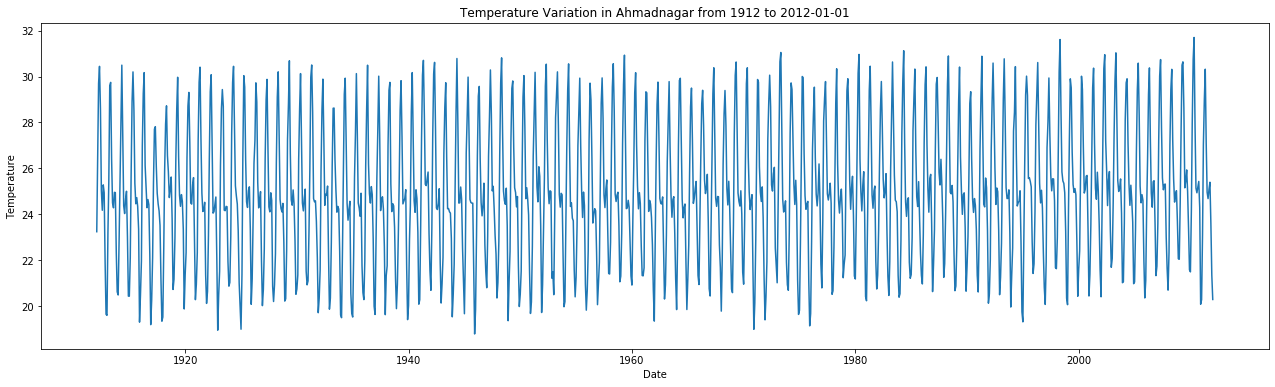

In [10]:
plt.figure(figsize=(22,6))
sns.lineplot(x=Ahm.index, y=Ahm['Temperature'])
plt.title('Temperature Variation in Ahmadnagar from 1912 to 2012-01-01')
plt.show()

In [11]:
# Creating a pivot table to plot the monthly temperatures through the years
Ahm['month'] = Ahm.index.month
Ahm['year'] = Ahm.index.year

Taking all the months as the index value and calculating the mean of the temperatures over the month. Hence we would get one
Temperature value over each month.

year     1912    1913    1914    1915    1916    1917    1918    1919    1920  \
month                                                                           
1      23.247  23.229  22.873  22.115  21.976  22.125  22.593  22.978  22.339   
2      26.310  25.402  25.369  25.714  26.980  25.373  25.903  26.297  26.466   
3      29.704  29.602  28.212  28.913  29.259  27.711  27.927  28.597  28.713   
4      30.443  29.745  30.495  30.201  30.170  27.818  28.725  29.968  29.309   
5      28.603  26.396  27.243  28.526  26.127  26.102  26.557  26.520  27.130   
6      25.029  24.498  24.380  25.357  25.195  24.920  25.852  24.825  24.498   
7      24.180  24.288  24.037  24.462  24.291  24.454  24.733  24.352  24.449   
8      25.285  24.960  24.677  24.730  24.647  24.147  25.103  24.862  25.291   
9      24.941  24.950  25.007  24.351  24.422  23.522  25.627  24.572  25.601   
10     21.878  22.316  23.014  23.358  22.248  21.144  23.810  23.356  23.037   
11     19.653  20.630  20.44

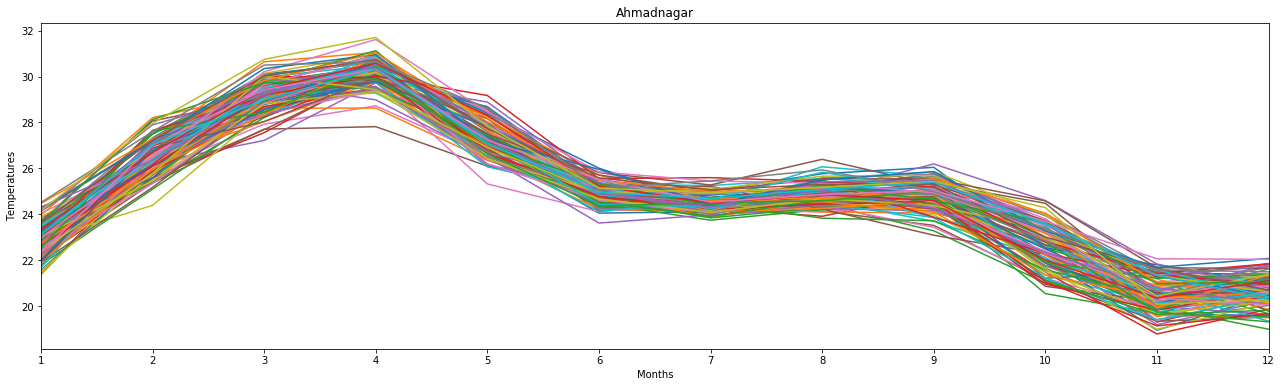

In [12]:
Plotmonthwise= pd.pivot_table(Ahm, values='Temperature', index='month', columns='year', aggfunc='mean')
print(Plotmonthwise)
Plotmonthwise.plot(figsize=(22,6))
plt.title('Ahmadnagar')
plt.xlabel('Months')
plt.ylabel('Temperatures')
# Labelling the 12 months at the x axis as it is a month wise plot.
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

One can observe the above pivot table of 12 x 100 where x axis has 12 months and y has the respective aggregate temperature of the particular month. Each coloured line graph represent 1 year and there 100 such line graphs which represent 100 years

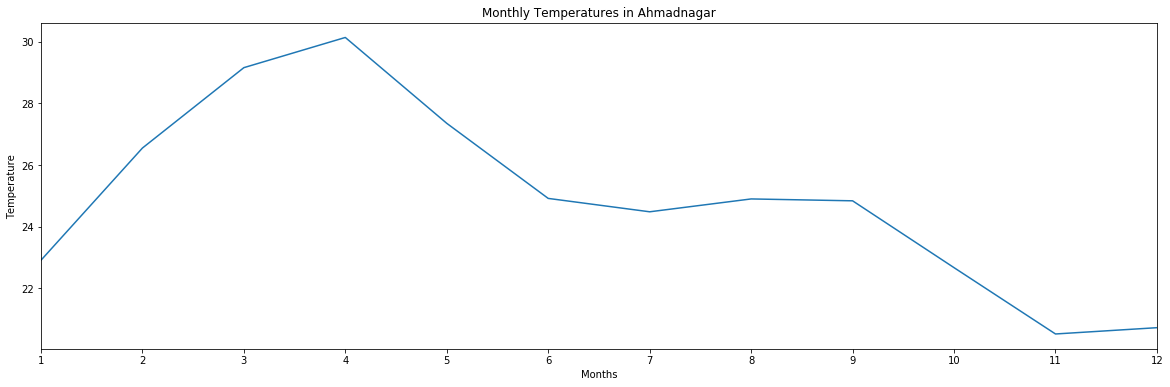

In [13]:
# Taking aggregate mean of the all the temperatures over the particular month of the years together from 1912-2012-01-01
monthly_seasonality =Plotmonthwise.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Ahmadnagar')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()

In the above graph we aggregated the monthly average temperature of each year and the result is seen in above graph.

Now for plotting the trend line which would fit in the graph of the temperature data of the average temperature of the year VS year. For fitting the trend line we will have to take the rolling mean of the previous 10(assuming, we can assume any number of years) years to mark the rolling mean of the particular year. From below code we would get the following required graph.

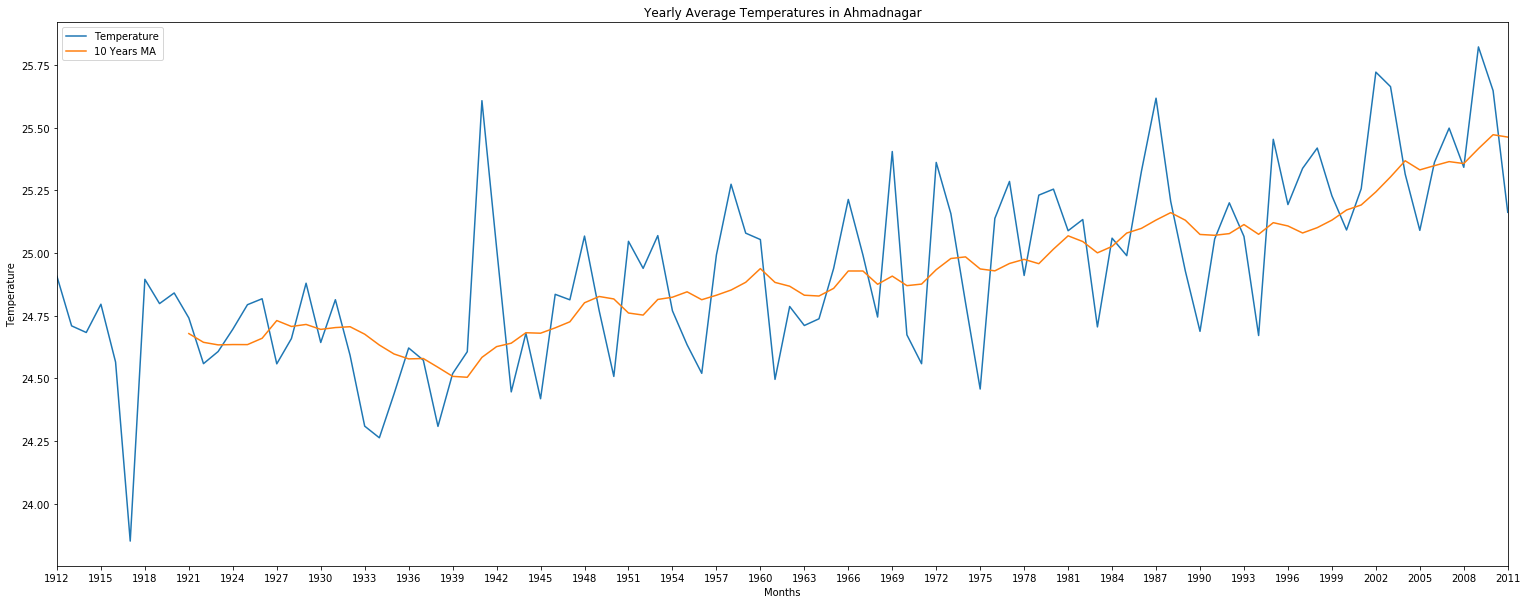

In [14]:
# Taking the index of the years and in other corresponding column we got the mean temperature of the particular year.
year_avg = pd.pivot_table(Ahm, values='Temperature', index='year', aggfunc='mean')
# Taking the rolling mean over previous 10 years.
year_avg['10 Years MA'] = year_avg['Temperature'].rolling(10).mean()
year_avg[['Temperature','10 Years MA']].plot(figsize=(26,10))
plt.title('Yearly Average Temperatures in Ahmadnagar')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1912,2012,3)])
plt.show()

The above graph is where yellow line the line which has the rolling mean and it alos shows the trend line.

As asked in Question we would now divide the dataset in 70% for training,20% for valdidation and 10% for testing.

In [15]:
train = Ahm[:-360].copy() # 70 years (70% in training)
val = Ahm[-360:-120].copy()# (360-120)=240 months= 20 years (20% in validation)
test = Ahm[-120:].copy() # 120 months=10 years (10% in validation)

Reason behind using copy function instead of = operator is that copy function has ability that changes made on old set would not affect the new one.

Default axis of shift function is zero(0).Shift(1,axis=0) this function eliminates the first(1) row(0) and shifts the coloumn by 1. Due to this shiffting we will be able to calculate the rmse value 


In [16]:
baseline = val['Temperature'].shift(1,axis=0)
# Now we need to the row which has no element(NaN)
baseline.dropna(inplace=True)
# You can see the observed changes we did by using head function.
baseline.head()

Date
1982-02-28    23.311
1982-03-31    26.101
1982-04-30    28.568
1982-05-31    29.783
1982-06-30    27.813
Freq: M, Name: Temperature, dtype: float64

In [17]:
# iloc[1:,0] means we will get datewise temperatures in coloumns (which is shifted by one index.)
val.iloc[1:,0]

Date
1982-02-28    26.101
1982-03-31    28.568
1982-04-30    29.783
1982-05-31    27.813
1982-06-30    25.517
               ...  
2001-08-31    25.836
2001-09-30    25.048
2001-10-31    23.567
2001-11-30    21.584
2001-12-31    20.415
Freq: M, Name: Temperature, Length: 239, dtype: float64

Now defining the function named measure_rmse would find the rmse value between two time series

In [18]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

In [19]:
# Using the function with the baseline values
rmse_base = measure_rmse(val.iloc[1:,0],baseline)
# We have the value of RMSE and rounding the value we get over 4 digits.
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 2.1092 celsius degrees


Defining certain functions so that we can find out the ACF and PACF of the training and validation sets respectively.

In [20]:
def plots_of_ACF_PACF(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()
    # Creating the plot figure sizes and determining theirpositions.
    ax1 = plt.subplot2grid((3, 3), (0, 0))
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (0, 1))
    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Ahmednagar Temperature Variation')
    # We will not include zero in our plots since they acf and pacf values at lag 0 are 1. 
    # We should not consider the lag at zeros for determing the order of AR and MA process
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')
    plt.tight_layout()

Now we would also determine the functions which would carry out the ADF tests over time series by using AIC and BIC criteria.

In [21]:
def ADF_Stationarity_Test_AIC(timeseries):
    a=0
    #Dickey-Fuller test:
    # Using the autolag as 'AIC'
    adfTest = adfuller(timeseries, autolag='AIC')
    # adfTest[0] is the Test Statistic by the Dicker Fuller Tests.
    a=adfTest[0]
    if True:
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
        #Add Critical Values
        dfResults=round(dfResults,2)
        for key,value in adfTest[4].items():
            dfResults['Critical Value (%s)'%key] = value.round(3)
        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)
    # adfTest[5] is the Critical Value at 5% 
    # If test statistic is less than the critical values at 5% then the time series is stationary.
    # We can also determine the statiority of the time series by p value 
    # If value of p is less than 0.01 than we can say that series is stationary.
    if (a<adfTest[5]):
             print("Is the time series stationary?:True")
    else:
             print("Is the time series stationary?:False")
# After defining the ADF_Statioanrity_Test_AIC
#Similarly we can also define the ADF_Stationarity_Test_BIC which has autolag='BIC'
def ADF_Stationarity_Test_BIC(timeseries):
    a=0
    #Dickey-Fuller test:
    adfTest = adfuller(timeseries, autolag='BIC')
    a=adfTest[0]

    if True:
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
        #Add Critical Values
        dfResults=round(dfResults,2)
        for key,value in adfTest[4].items():
            dfResults['Critical Value (%s)'%key] = value.round(3)
        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)
    if (a<adfTest[5]):
             print("Is the time series stationary?:True")
    else:
             print("Is the time series stationary?:False")

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -6.450
P-Value                   0.000
# Lags Used              21.000
# Observations Used     818.000
Critical Value (1%)      -3.438
Critical Value (5%)      -2.865
Critical Value (10%)     -2.569
dtype: float64
Is the time series stationary?:True
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -6.600
P-Value                   0.000
# Lags Used              17.000
# Observations Used     822.000
Critical Value (1%)      -3.438
Critical Value (5%)      -2.865
Critical Value (10%)     -2.569
dtype: float64
Is the time series stationary?:True


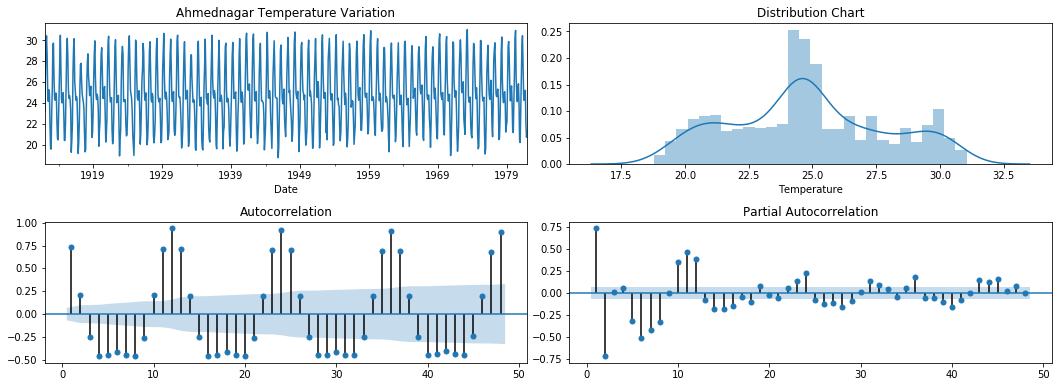

In [22]:
# Plotting the ACF and PACF plots of the training data and also applying the augmented dickey fuller (ADF) test over the set.
y=train['Temperature']
plots_of_ACF_PACF(y)
ADF_Stationarity_Test_AIC(y)
ADF_Stationarity_Test_BIC(y)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -9.320
P-Value                   0.000
# Lags Used              13.000
# Observations Used     814.000
Critical Value (1%)      -3.438
Critical Value (5%)      -2.865
Critical Value (10%)     -2.569
dtype: float64
Is the time series stationary?:True
Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -10.500
P-Value                   0.000
# Lags Used              12.000
# Observations Used     815.000
Critical Value (1%)      -3.438
Critical Value (5%)      -2.865
Critical Value (10%)     -2.569
dtype: float64
Is the time series stationary?:True


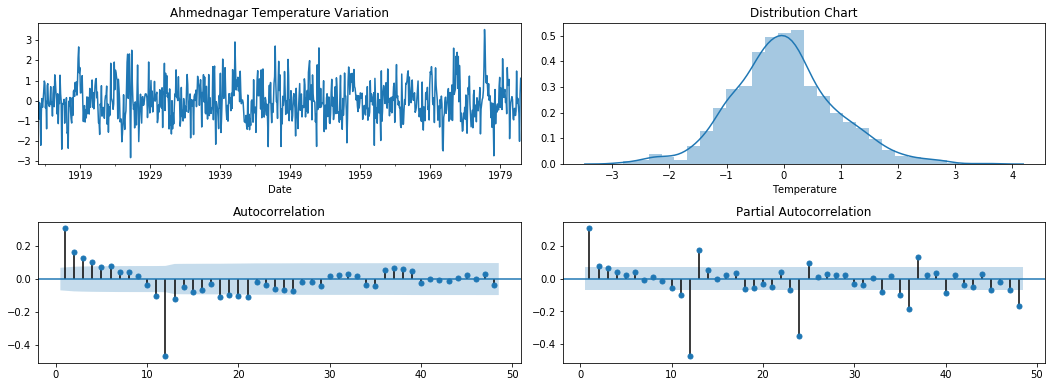

In [23]:
# Since in above plots of ACF and PACF we can see that there are significant spikes around the lag 12.
# From this observation we can understand that we can do seasonal differencing of order 12
y1=train['Temperature'].diff(12).dropna()
plots_of_ACF_PACF(y1)
ADF_Stationarity_Test_AIC(y1)
ADF_Stationarity_Test_BIC(y1)

After resolving the seasonal difference on the data set we get the above plots of the ACF and PACF.
Now we can predict the values of p,d,q,P,Q,D,S. Since we did the seasonal differencing of order 12 we get S=12
p=0,1 (Order of AR process, observe the plot of PACF);
P=0,1   (Order of SAR process, observe the plot of PACF);
q=0,1,2(Order of MA process, observe the plot of ACF);
Q=0,1(Order of SMA process, observe the plot of ACF);
Defining the function which will be able to predict using the SARIMA model.
The dataset which would be predicted from the training needs to be validated.
The evaluated terms such as p,q,d,P,Q,D,S are used in below function. We assume that D=1 let it be first order differencing
Parsimony of the model is very important. We should not try to fit the model by including more number of parameters which will increase the complexity of the model. Hence the choice of the value of the p,q,P,Q should be done accordingly.


After we are done with parameters we need to predict temperatures of length of validation set. For this purpose we would define the function which would take the training and validation sets and the parameters which we have seen above.

Since there are various possible models beacause of different combinations of pdq and PQDS we have to find the best model which has lowest AIC and BIC values. Since I have a doubt here that which parameter(AIC or BIC) would decide the model since changes are low that both cannot be minimum at the same permutation of parameters.

In [24]:
import itertools
def find_best_aic(train):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    myDict = {}
    results_AIC=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)# Defining the SARIMA model
                results = mod.fit()# Fitting the model
                myDict[results.aic] = [param,param_seasonal] # Creating dictionary which would have keys of aic values and 
                                                            #  value as its parameters
                results_AIC.append(results.aic)
    return myDict[min(results_AIC)]# Result will be the model parameters with lowest AIC value

In [25]:
find_best_aic(train['Temperature'])

[(1, 0, 1), (0, 1, 1, 12)]

In [26]:
def find_best_bic(train):
    p = d = q = range(0, 2) # Since these belong in range(0,2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    myDict = {}
    results_BIC=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False) # Defining the SARIMA model

                results = mod.fit() # Fitting the model
                myDict[results.bic] = [param,param_seasonal] # Creating dictionary which would have keys of bic values and 
                                                            #  value as its parameters 
                results_BIC.append(results.bic)
    return myDict[min(results_BIC)] # Result will be the model parameters with lowest BIC value

In [27]:
find_best_bic(train['Temperature'])

[(1, 0, 1), (0, 1, 1, 12)]

In this case by using both 'AIC' and 'BIC' both criterias we get same model. Hence value of pdq=(1,0,1);PQDS=(0,1,1,12)

In [28]:
def walk_forward(training_set, validation_set, params):
    '''
    Params: it's a tuple where you put together the following SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]   # History is list of temperatures at training set
    prediction = list()                          # Prediction empty list which would be filled by predictions made by SARIMA
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):            # A for loop till length of validation set
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend) # Defining model and parameters
        result = model.fit(disp=False) # Fitting the model, disp=False ignores all the noise
        yhat = result.predict(start=len(history), end=len(history)) # Yhat is set having the predicting values 
        prediction.append(yhat[0]) # Each time appending the first element
        history.append(validation_set[week])
        # Here we need to understand that the history would increase by the lenght since each element of validation set is added
        # to it. Hence at the end of the loop history would have training_set and Validation_set
        
    return prediction # Giving the final output of themlist if the predicting values

The prediction is the val['Pred'] and we decided the parameters by observing the plots of ACF and PACF and also considering
the principle of parsimony.

In [29]:
val['Pred'] = walk_forward(train['Temperature'], val['Temperature'], ((1,0,1),(0,1,1,12),'c'))

In [65]:
rmse_pred = measure_rmse(val['Temperature'], val['Pred'])

print(f"The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round(-(rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(3,0,0),(0,1,1,12),'c' model was 0.5735 celsius degrees
It's a decrease of 72.81% in the RMSE


The above data shows that using the SARIMA model with appropiate parameters, there is huge decrease in the error.

In [30]:
# Creating the error column
val['Error'] = val['Temperature'] - val['Pred'] 

Since we now know the error in predicted values of temperature. We will plot the various graphs which would be useful to visulize the errors/residuals. 

In [31]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0)) # upper-left plot
    ax2 = plt.subplot2grid((2,2), (0,1)) # upper-right plot
    ax3 = plt.subplot2grid((2,2), (1,0)) # lower-left plot
    ax4 = plt.subplot2grid((2,2), (1,1)) # lower-right plot
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2]) #Taking the column of Current and Predicted values of Temperature.
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [32]:
# We need to remove some columns to plot the charts
val.drop(['month','year'], axis=1, inplace=True)
val.head()

,Temperature,Pred,Error
Date,,,
1982-01-31,23.311,23.175193,0.135807
1982-02-28,26.101,26.815589,-0.714589
1982-03-31,28.568,29.198677,-0.630677
1982-04-30,29.783,29.969005,-0.186005
1982-05-31,27.813,27.247371,0.565629


We know that val.iloc[:,0] shows the columns of current values;val.iloc[:,1] shows the coloum of error value; val.iloc[:,2]shows the coloumn of the predicted value.

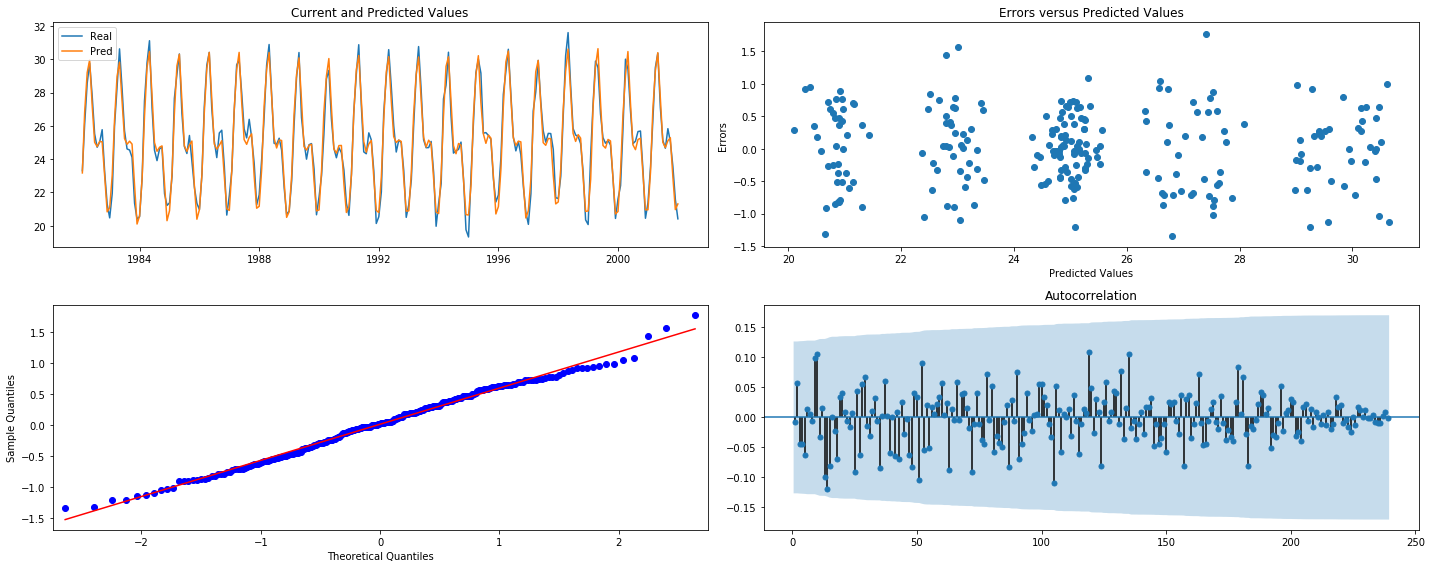

In [33]:
plot_error(val)

In [34]:
# Adding both the datasets which would increase the history and we can predict better the test temperature
future=pd.concat([train['Temperature'],val['Temperature']])

In [35]:
model = sm.tsa.statespace.SARIMAX(future, order=(1,0,1), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

In [55]:
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+len(test)))

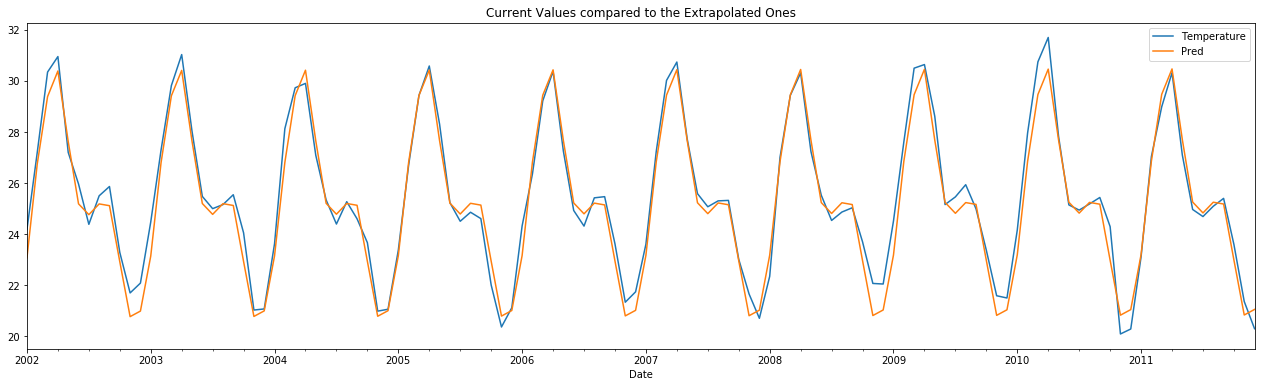

In [56]:
test[['Temperature', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

For finding out the RMSE and MAE during the period of training,validation,testing we define the following function. We would shift the data set and we will get a new dataset which would be used to find the RMSE and MAE.

In [66]:
def check_rmse_mae(data):
    baseline= data['Temperature'].shift(1,axis=0)
    # Now we need to remove the row which has no element(NaN)
    baseline.dropna(inplace=True)
    # Using the function with the baseline values
    rmse_data = measure_rmse(data.iloc[1:,0],baseline)
    from sklearn.metrics import mean_absolute_error
    mae=mean_absolute_error(data.iloc[1:,0],baseline)
    return [round(rmse_data,4),round(mae,4)]


In [67]:
index=['RMSE','MAE']
df=pd.DataFrame({'train':check_rmse_mae(train),
        'val':check_rmse_mae(val),
        'test':check_rmse_mae(test)},index=index)
print(df)
# Below is the Required table of the RMSE and MAE for all the three periods of training,validation,testing.

       train     val    test
RMSE  2.1666  2.1092  2.0820
MAE   1.7696  1.7491  1.7091


In [68]:
# rmse_test_extrap is the value of the rmse of the sets which we have predicted and the original testing set.
rmse_test_extrap=round(measure_rmse(test['Pred'],test['Temperature']),4)
print(rmse_test_extrap)

0.598


In [69]:
# We removed the mean_adsolute_error
from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(test['Pred'],test['Temperature']),4)

0.481

In [72]:
print('That is an improvement of'+' '+str(round(-(rmse_test_extrap/rmse_data-1)*100))+'%')

That is an improvement of 71%


In [ ]:
# References
# https://www.kaggle.com/leandrovrabelo/climate-change-forecast-sarima-model
# https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
# https://www.edureka.co/community/43207/how-to-find-an-element-in-pandas-dataframe
# https://github.com/gianfelton/SARIMA-Param-Search-for-Python/blob/master/Seasonal%20ARIMA%20with%20Param%20Search.ipynb

In [ ]:
# Discussion Colabarators
# Rahul Patel
# Anas Ali
# Hardik Khichi
# Kamlesh Sawdekar